In [1]:
import pickle
# Load episode data from previous scraping exercise
with open('simpsons_scripts.pickle', 'rb') as eps_file:
    episodes = pickle.load(eps_file)

In [2]:
# Go through the seasons and add scripts to a list to facilitate vectorization
ep_scripts = []
ep_script_lookup = {}
for season in episodes:
    for episode in episodes[season]:
        ep_scripts.append(episodes[season][episode]['script'])
        ep_script_lookup[len(ep_scripts)-1] = {}
        ep_script_lookup[len(ep_scripts)-1]['season'] = season
        ep_script_lookup[len(ep_scripts)-1]['title'] = episode

In [7]:
# Sentiment analysis with nltk library

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import math
import string

ep_script = ep_scripts[100]
ep_script_sentences = sent_tokenize(ep_script)
ep_script_words = word_tokenize(ep_script)

# Remove punctuation and empty and make lowercase
ep_script_words = [''.join(c for c in s if s not in string.punctuation) for s in ep_script_words]
ep_script_words = [s.lower() for s in ep_script_words if s]

print('# sentences:', len(ep_script_sentences))
print('# words:', len(ep_script_words))

ep_sentiment_scores = []
sid = SentimentIntensityAnalyzer()

# Sliding window approach as described in: 
# "The emotional arcs of stories are dominated by six basic shapes", https://arxiv.org/abs/1606.07772
words_per_window = 100
starting_word_idx = 0
while starting_word_idx + words_per_window < len(ep_script_words):
    script_slice = ep_script_words[starting_word_idx:starting_word_idx+words_per_window]
    ss = sid.polarity_scores(' '.join(script_slice))
    ep_sentiment_scores.append(ss['compound'])
    print('\'' + ' '.join(script_slice) + '\'' + '\n\tScore: ' + str(ss['compound']))
    starting_word_idx += 1

[nltk_data] Downloading package punkt to /Users/allen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/allen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# sentences: 409
# words: 2823
'chorus `` the simpsons `` bell ringing whistle blowing beeping `` jazzy solo tires screeching d'oh screams oh how can they imprison kids in school on a beautiful day like this they 're not imprisoning us bart they 're -- prison bus otto the regular school bus broke down so take a seat before i blow your heads off otto oh sorry this bus and i have sort of a shining thing going on. `` blues sighs deeply ahhh -- sighs this is what being a kid is all about hey huck what 's l-i-n-c-o-n doing here i do n't'
	Score: -0.296
'`` the simpsons `` bell ringing whistle blowing beeping `` jazzy solo tires screeching d'oh screams oh how can they imprison kids in school on a beautiful day like this they 're not imprisoning us bart they 're -- prison bus otto the regular school bus broke down so take a seat before i blow your heads off otto oh sorry this bus and i have sort of a shining thing going on. `` blues sighs deeply ahhh -- sighs this is what being a kid is all a

	Score: 0.8824
'na check up on me that 's okay bart i trust you ''please excuse my handwriting '' i busted whichever hand it is i write with signed mrs simpson '' you were right to be suspicious edna to the crime lab hmm inconclusive scoffs i wish more students had agreed to these electronic tracking implants we only had one volunteer spill it where 's your brother you 'd better answer him lisa he 's a bad man giggling what are you laughing about you started off as the bad cop and now you 're the good one you and willie'
	Score: 0.8824
'check up on me that 's okay bart i trust you ''please excuse my handwriting '' i busted whichever hand it is i write with signed mrs simpson '' you were right to be suspicious edna to the crime lab hmm inconclusive scoffs i wish more students had agreed to these electronic tracking implants we only had one volunteer spill it where 's your brother you 'd better answer him lisa he 's a bad man giggling what are you laughing about you started off as the ba

	Score: 0.9741
'the -- laughs freddy honey i think something just dropped into the backseat i 'm not paying you to talk gim me the ball people the punch has been spiked laughs laughs that 's my nephew displaying the quimby wit that 's won the public 's heart happy birthday freddy and may all your disgraces be uh private yes all hear hear yes all hear hear and who are you little boy and who are you little boy i 'm one of your nephews you do n't see very often uh bart-bart hey mcbain i 'm a big fan but'
	Score: 0.9072
'-- laughs freddy honey i think something just dropped into the backseat i 'm not paying you to talk gim me the ball people the punch has been spiked laughs laughs that 's my nephew displaying the quimby wit that 's won the public 's heart happy birthday freddy and may all your disgraces be uh private yes all hear hear yes all hear hear and who are you little boy and who are you little boy i 'm one of your nephews you do n't see very often uh bart-bart hey mcbain i 'm a big

	Score: 0.8612
'bite out of the big rice krispy square oh yeah and the waiter 's been brutally beaten laughs oh yeah and the waiter 's been brutally beaten laughs it says freddy quimby beat a waiter half to death those quimby children are so wild and rich i hope he finally gets what 's coming to him but freddy quimby 's innocent how do you know there were n't any witnesses chuckles oh yeah right you 'd think someone would 've seen something at a crowded party like that well they did n't okay they did n't it says so right'
	Score: 0.8612
'out of the big rice krispy square oh yeah and the waiter 's been brutally beaten laughs oh yeah and the waiter 's been brutally beaten laughs it says freddy quimby beat a waiter half to death those quimby children are so wild and rich i hope he finally gets what 's coming to him but freddy quimby 's innocent how do you know there were n't any witnesses chuckles oh yeah right you 'd think someone would 've seen something at a crowded party like that wel

	Score: 0.3612
'bart simpson i know you cut school yesterday and as soon as i can prove it i 'm shipping you off to the christian military reform school what he said oh i see if you testify skinner will know you skipped school well if freddy quimby did n't do it i 'm sure he 'll be found innocent by a fair and impartial jury oh jury duty i 'll see that quimby kid hang for this sighs i knew it was a bad idea to watch him open the mail let 's go over to the county courthouse live to'
	Score: 0.3612
'simpson i know you cut school yesterday and as soon as i can prove it i 'm shipping you off to the christian military reform school what he said oh i see if you testify skinner will know you skipped school well if freddy quimby did n't do it i 'm sure he 'll be found innocent by a fair and impartial jury oh jury duty i 'll see that quimby kid hang for this sighs i knew it was a bad idea to watch him open the mail let 's go over to the county courthouse live to kent'
	Score: 0.3612
'i know you

'is totally innocent first of all his accuser is a very shady character that waiter mr. lacoste not only was n't born in springfield he was n't even born in this country gasping murmuring it 's an exclusive. from now on you tell me everything uh freddy quimby was with me the entire night in question we were collecting canned goods for the starving people in uh you know one of them loser countries well that clears quimby he 's clearly innocent oh good my laundry is done you see lisa they do n't need my testimony only because mayor'
	Score: 0.7708
'totally innocent first of all his accuser is a very shady character that waiter mr. lacoste not only was n't born in springfield he was n't even born in this country gasping murmuring it 's an exclusive. from now on you tell me everything uh freddy quimby was with me the entire night in question we were collecting canned goods for the starving people in uh you know one of them loser countries well that clears quimby he 's clearly innocent oh g

	Score: 0.7447
'he 's wealthy therefore inherently good woman yes innocent mr. quimby did you assault mr. lacoste of course not i love each and every living thing on god 's green earth well therefore you certainly would never lose your temper over something as trivial as the pronunciation of '' chowder '' that 's `` chowdah '' ''chowdah '' i 'll kill you i 'll kill all of you especially those of you in the jury gasps murmuring he 's clearly guilty wow that did n't go well the defense rests will the jury retire and come to its decision chuckles'
	Score: 0.8137
''s wealthy therefore inherently good woman yes innocent mr. quimby did you assault mr. lacoste of course not i love each and every living thing on god 's green earth well therefore you certainly would never lose your temper over something as trivial as the pronunciation of '' chowder '' that 's `` chowdah '' ''chowdah '' i 'll kill you i 'll kill all of you especially those of you in the jury gasps murmuring he 's clearly guilty 

	Score: 0.5641
'up the good work toots laughs groans chuckles chicks on the bench why bother votin he 's guilty well we might as well make it official what does `` sequestered '' mean if the jury is deadlocked they are put in a hotel together so they ca n't communicate with the outside world what does `` deadlocked '' mean it 's when the jury ca n't agree on a verdict uh-huh and `` if a conjunction meaning `` in the event that '' or `` on condition that '' so if we do n't all vote the same way we'
	Score: 0.5641
'the good work toots laughs groans chuckles chicks on the bench why bother votin he 's guilty well we might as well make it official what does `` sequestered '' mean if the jury is deadlocked they are put in a hotel together so they ca n't communicate with the outside world what does `` deadlocked '' mean it 's when the jury ca n't agree on a verdict uh-huh and `` if a conjunction meaning `` in the event that '' or `` on condition that '' so if we do n't all vote the same way w

	Score: 0.2378
'send up two more pot roasts and three more pillows with mints on 'em you know chuckles we 're kind of like the original odd couple you 're the messy one and i 'm -- shut up oh yes very well `` itchy and scratchy theme so bart have your insides been gnawed away by guilt yet sell it to hallmark sis you 're looking at cucumber boy as in `` cool as a '' announcer next on mcgarnigal -- mcgarnigal is framed for a crime he did n't commit and only one witness can clear his name a little'
	Score: 0.2378
'up two more pot roasts and three more pillows with mints on 'em you know chuckles we 're kind of like the original odd couple you 're the messy one and i 'm -- shut up oh yes very well `` itchy and scratchy theme so bart have your insides been gnawed away by guilt yet sell it to hallmark sis you 're looking at cucumber boy as in `` cool as a '' announcer next on mcgarnigal -- mcgarnigal is framed for a crime he did n't commit and only one witness can clear his name a little siss

'did n't inflict these injuries on mr. lacoste just who did well i was hiding in the kitchen when it all happened say it frenchy. say `` chowdah never okay you asked for it i 'm gon na enjoy this grunting snapping ow ooh ow ooh ow ooh and that 's what really happened this is an outrage i am not a clumsy clouseau-esque waiter i will -- whoa whoo whoo screaming ooh. ow. ow. ow. at least there were no big ones loud clamp ay how could you have seen all this bart were n't you supposed to be'
	Score: -0.6874
'n't inflict these injuries on mr. lacoste just who did well i was hiding in the kitchen when it all happened say it frenchy. say `` chowdah never okay you asked for it i 'm gon na enjoy this grunting snapping ow ooh ow ooh ow ooh and that 's what really happened this is an outrage i am not a clumsy clouseau-esque waiter i will -- whoa whoo whoo screaming ooh. ow. ow. ow. at least there were no big ones loud clamp ay how could you have seen all this bart were n't you supposed to be in'
	

# sentiment scores: 2723
[-0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.296, -0.0258, -0.0258, -0.0258, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, 0.2732, -0.4215, -0.4215, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.6486, -0.25, -0.25, -0.25, -0.25, -0.25, 0.0258, 0.0258, 0.4404, 0.4404, 0.4404, 0.4404, 0.4404, 0.1513, 0.1513, 0.1513, 0.0763, 0.0763, 0.0763, 0.0763, 0.0763, 0.0763, 0.1145, 0.1145, 0.1145, 0.1145, -0.3619, -0.3619, -0.191, -0.191, -0.191, -0.191, -0.191, -0.191, -0.191, -0.191, 0.2609, 0.5922, 0.5922, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, 0.1893, -0.2967, 0.2255, 0.2255, 0.2255, 0.2255, 0.2255, 0.2255, 0.2255, 0.0891, 0.0891, 0.0891, 0.0891, 0.0891, 0.0891, 

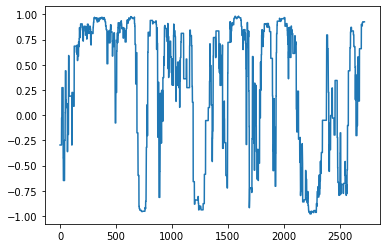

In [8]:
# Do some basic plotting of the sentiment scores

import matplotlib.pyplot as plt
%matplotlib inline

print('# sentiment scores:', len(ep_sentiment_scores))
print(ep_sentiment_scores)
plt.plot(ep_sentiment_scores)
plt.show()

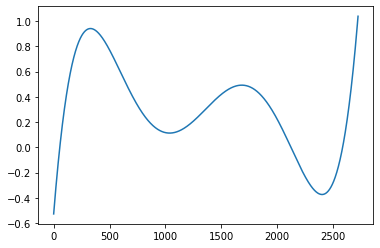

In [17]:
# Smooth out the chart

import numpy as np

def get_coeff_value(x, coeffs):
    ys = []
    for x_val in x:
        y = 0
        for i, coeff in enumerate(coeffs):
            y += coeff*x_val**i
        ys.append(y)
    
    return ys

ss_ids = [i for i in range(len(ep_sentiment_scores))]

# TODO: experiement with different degree values
z = np.polynomial.polynomial.polyfit(ss_ids, ep_sentiment_scores, 5)
plt.plot(get_coeff_value(ss_ids, z))
plt.show()